# Testing

In [1]:
import numpy as np
import pandas as pd
np.random.seed(13)

import matplotlib.pyplot as plt
import seaborn as sns

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

## PCA

In [3]:
from from_scratch import pca_from_eigendecomposition

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
X_test = df.iloc[:, :-1].values
X_test.shape

(150, 4)

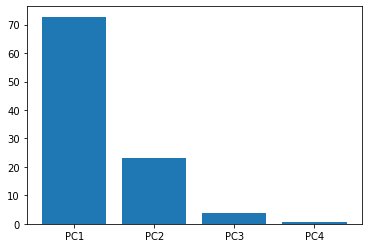

4


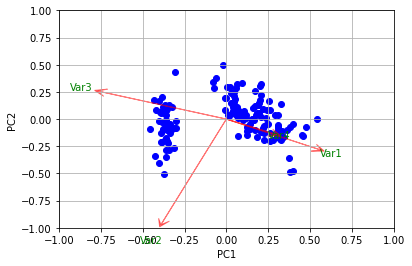

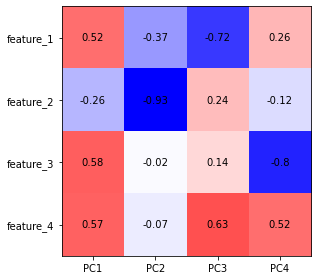

,PC1,PC2,PC3,PC4,Y
0,-2.264542,-0.505704,-0.121943,0.023073,setosa
1,-2.086426,0.655405,-0.227251,0.103208,setosa
2,-2.367950,0.318477,0.051480,0.027825,setosa
3,-2.304197,0.575368,0.098860,-0.066311,setosa
4,-2.388777,-0.674767,0.021428,-0.037397,setosa
...,...,...,...,...,...
145,1.870522,-0.382822,0.254532,0.388890,virginica
146,1.558492,0.905314,-0.025382,0.221322,virginica
147,1.520845,-0.266795,0.179277,0.118903,virginica
148,1.376391,-1.016362,0.931405,0.024146,virginica


In [40]:
pca_df = pca_from_eigendecomposition(X_test)
pca_df["Y"] = df["species"]
pca_df

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

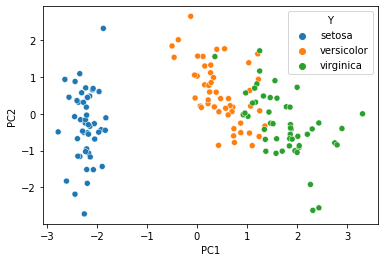

In [34]:
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Y")

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit(X_test)
X_scaled = scaler.fit_transform(X_test)

In [10]:
pca_obj = PCA()
pca_obj.fit(X_scaled)

PCA()

In [11]:
x_pca = pca_obj.fit_transform(X_scaled)
pca_df = pd.DataFrame(x_pca)
pca_df.columns = ["PC{}".format(str(i+1)) for i in range(x_pca.shape[1])]
pca_df["Y"] = df["species"]
pca_df

,PC1,PC2,PC3,PC4,Y
0,-2.264542,0.505704,-0.121943,-0.023073,setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,setosa
2,-2.367950,-0.318477,0.051480,-0.027825,setosa
3,-2.304197,-0.575368,0.098860,0.066311,setosa
4,-2.388777,0.674767,0.021428,0.037397,setosa
...,...,...,...,...,...
145,1.870522,0.382822,0.254532,-0.388890,virginica
146,1.558492,-0.905314,-0.025382,-0.221322,virginica
147,1.520845,0.266795,0.179277,-0.118903,virginica
148,1.376391,1.016362,0.931405,-0.024146,virginica


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

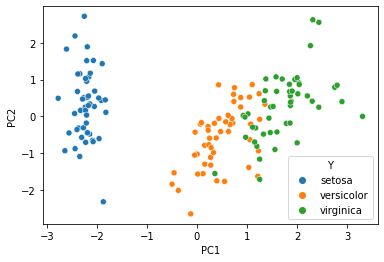

In [12]:
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Y")

In [18]:
loadings = pd.DataFrame(pca_obj.components_.T, columns=["PC{}".format(str(i+1)) for i in range(x_pca.shape[1])], index=df.columns[:-1])
loadings

,PC1,PC2,PC3,PC4
sepal_length,0.522372,0.372318,-0.721017,-0.261996
sepal_width,-0.263355,0.925556,0.242033,0.124135
petal_length,0.581254,0.021095,0.140892,0.801154
petal_width,0.565611,0.065416,0.633801,-0.523546


In [19]:
loadings = pca_obj.components_.T * np.sqrt(pca_obj.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=["PC{}".format(str(i+1)) for i in range(x_pca.shape[1])], index=df.columns[:-1])
loading_matrix

,PC1,PC2,PC3,PC4
sepal_length,0.894210,0.358549,-0.277701,-0.037736
sepal_width,-0.450818,0.891328,0.093219,0.017880
petal_length,0.995007,0.020315,0.054265,0.115394
petal_width,0.968229,0.062997,0.244110,-0.075409
